# Activity

In [ ]:
!cd collected_data

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a pandas DataFrame
free_activity_df = pd.read_csv('free_activity.csv', names = ["Activity_free"])
sparse_activity_df = pd.read_csv('sparse_activity.csv', names = ["Activity_sparse"])
dense_activity_df = pd.read_csv('dense_activity.csv', names = ["Activity_dense"])

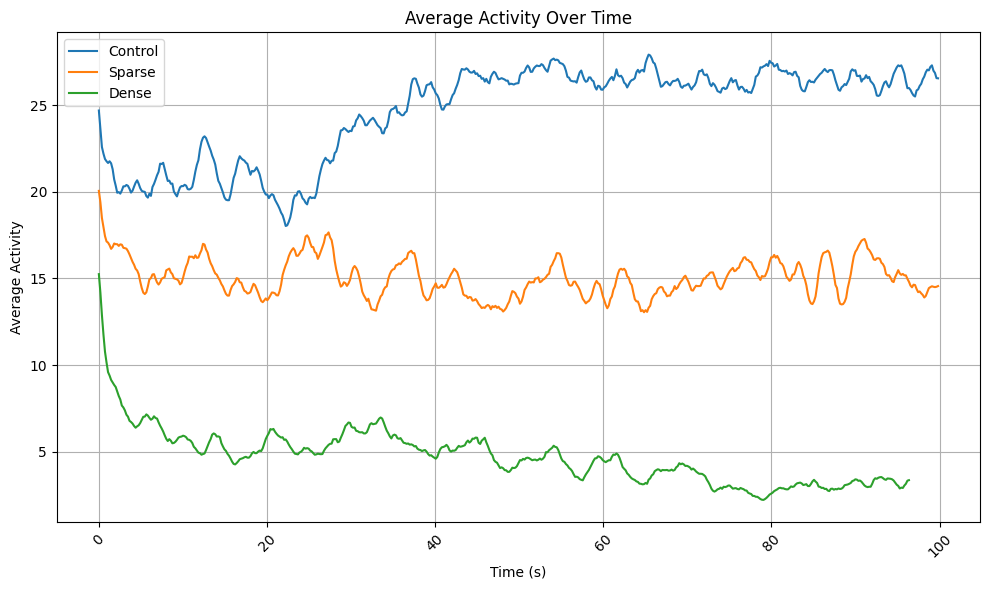

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


merged_df = free_activity_df.join( [sparse_activity_df, dense_activity_df])


import numpy as np
merged_df['Time'] = np.zeros(len(merged_df))
for i in range (1,len(merged_df)):
    merged_df['Time'][i] = 100 /len(merged_df)*merged_df.index[i] 

plt.figure(figsize=(10, 6))  


plt.plot(merged_df["Time"], merged_df["Activity_free"], label="Control")
plt.plot(merged_df["Time"], merged_df["Activity_sparse"], label="Sparse")
plt.plot(merged_df["Time"], merged_df["Activity_dense"], label="Dense")

plt.title('Average Activity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Average Activity')
plt.legend() 
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


In [67]:
print(np.nanmean(merged_df["Activity_free"]))
print(np.nanstd(merged_df["Activity_free"]))

24.646265938069217
2.711108446300363


In [69]:
print(np.nanmean(merged_df["Activity_sparse"]))
print(np.nanstd(merged_df["Activity_sparse"]))

15.05540983606557
1.0964435243832233


In [68]:
print(np.nanmean(merged_df["Activity_dense"]))
print(np.nanstd(merged_df["Activity_dense"]))

4.704905660377358
1.603462553635524


# Directionality

In [ ]:
free_x_dir_df = pd.read_csv('dir_x_free.csv', names = ["x_dir_free"])
free_y_dir_df = pd.read_csv('dir_x_free.csv', names = ["y_dir_free"])
sparse_x_dir_df = pd.read_csv('dir_x_sparse.csv', names = ["x_dir_sparse"])
sparse_y_dir_df = pd.read_csv('dir_x_sparse.csv', names = ["y_dir_sparse"])
dense_x_dir_df = pd.read_csv('dir_x_dense.csv', names = ["x_dir_dense"])
dense_y_dir_df = pd.read_csv('dir_x_dense.csv', names = ["y_dir_dense"])

<Figure size 1000x600 with 0 Axes>

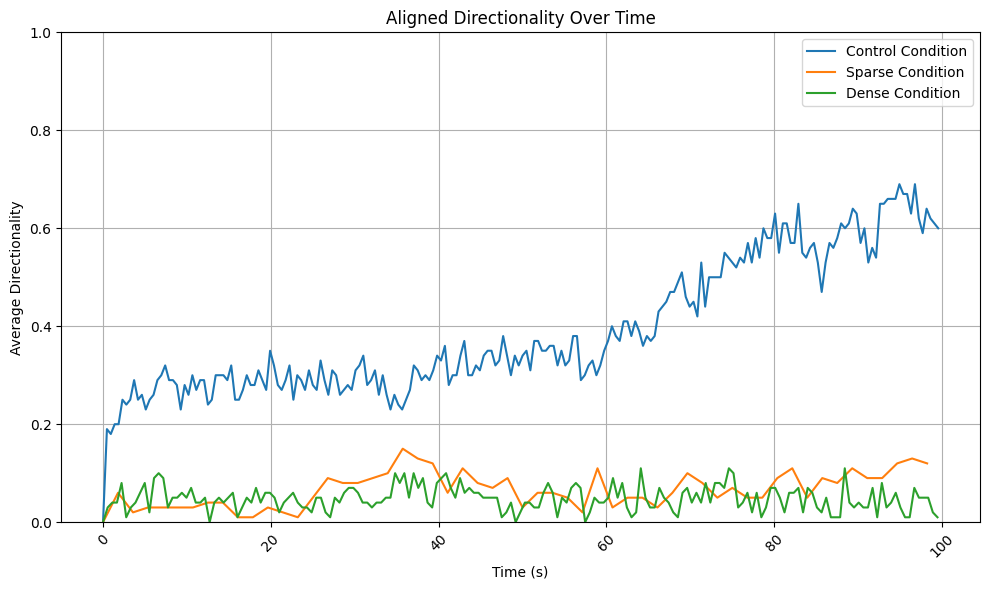

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

#Free
merged_df = free_x_dir_df.join( [free_y_dir_df])


import numpy as np
merged_df['Time'] = np.zeros(len(merged_df))
for i in range (1,len(merged_df)):
    merged_df['Time'][i] = 100 /len(merged_df)*merged_df.index[i] 
#Compute overall directionality
merged_df['Directionality'] = np.zeros(len(merged_df))
for i in range (1,len(merged_df)):
    merged_df['Directionality'][i] = np.abs(merged_df["x_dir_free"][i]) + np.abs(merged_df["y_dir_free"][i])

#Dense    
merged_df2 = dense_x_dir_df.join( [dense_y_dir_df])


import numpy as np
merged_df2['Time'] = np.zeros(len(merged_df2))
for i in range (1,len(merged_df2)):
    merged_df2['Time'][i] = 100 /len(merged_df2)*merged_df2.index[i] 
#Compute overall directionality
merged_df2['Directionality'] = np.zeros(len(merged_df2))
for i in range (1,len(merged_df2)):
    merged_df2['Directionality'][i] = np.abs(merged_df2["x_dir_dense"][i]) + np.abs(merged_df2["y_dir_dense"][i])

# Sparse
merged_df3 = sparse_x_dir_df.join( [sparse_y_dir_df])

merged_df3['Time'] = np.zeros(len(merged_df3))
for i in range (1,len(merged_df3)):
    merged_df3['Time'][i] = 100 /len(merged_df3)*merged_df3.index[i] 
#Compute overall directionality
merged_df3['Directionality'] = np.zeros(len(merged_df3))
for i in range (1,len(merged_df3)):
    merged_df3['Directionality'][i] = np.abs(merged_df3["x_dir_sparse"][i]) + np.abs(merged_df3["y_dir_sparse"][i])

plt.figure(figsize=(10, 6)) 
# Plot each dataset
plt.plot(merged_df["Time"], merged_df["Directionality"], label="Control Condition")
plt.plot(merged_df3["Time"], merged_df3["Directionality"], label="Sparse Condition")
plt.plot(merged_df2["Time"], merged_df2["Directionality"], label="Dense Condition")

plt.title('Aligned Directionality Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Average Directionality')
plt.legend() 
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.ylim(0, 1) 
plt.show()

In [50]:
print("Mean control directionality: ", np.nanmean(merged_df["Directionality"]))
print("Standard deviation control directionality: ", np.nanstd(merged_df["Directionality"]))
print("Mean sparse directionality: ", np.nanmean(merged_df3["Directionality"]))
print("Standard deviation sparse directionality: ",np.nanstd(merged_df3["Directionality"]))
print("Mean dense directionality: ", np.nanmean(merged_df2["Directionality"]))
print("Standard deviation dense directionality: ",np.nanstd(merged_df2["Directionality"]))

Mean control directionality:  0.39027777777777783
Standard deviation control directionality:  0.13603143926730984
Mean sparse directionality:  0.06589285714285714
Standard deviation sparse directionality:  0.03614340414605832
Mean dense directionality:  0.04817679558011049
Standard deviation dense directionality:  0.02488629862685395
